In [2]:
import os, sys
import numpy as np
import pyvista as pv
import matplotlib.pyplot as plt
from scipy.constants import c 

%matplotlib widget

sys.path.append('../../../')

from solverFIT3D import SolverFIT3D
from gridFIT3D import GridFIT3D 
from wakeSolver import WakeSolver



wake = WakeSolver()
wake.load_results('../results_beta09')

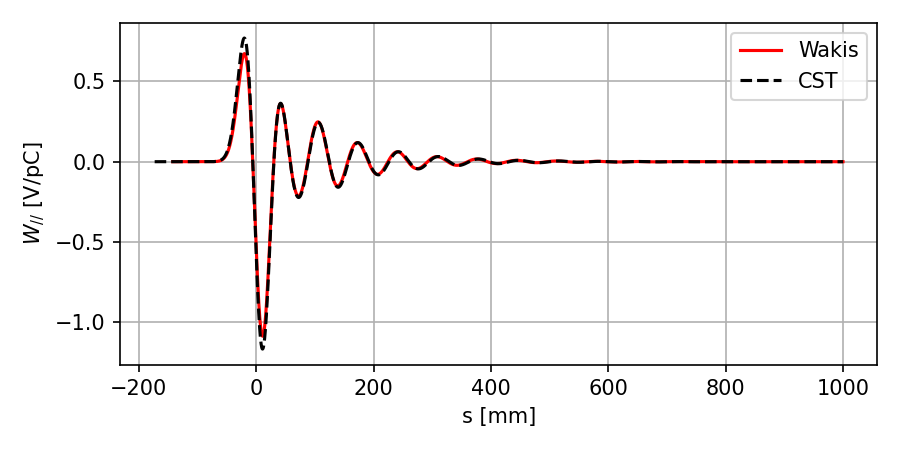

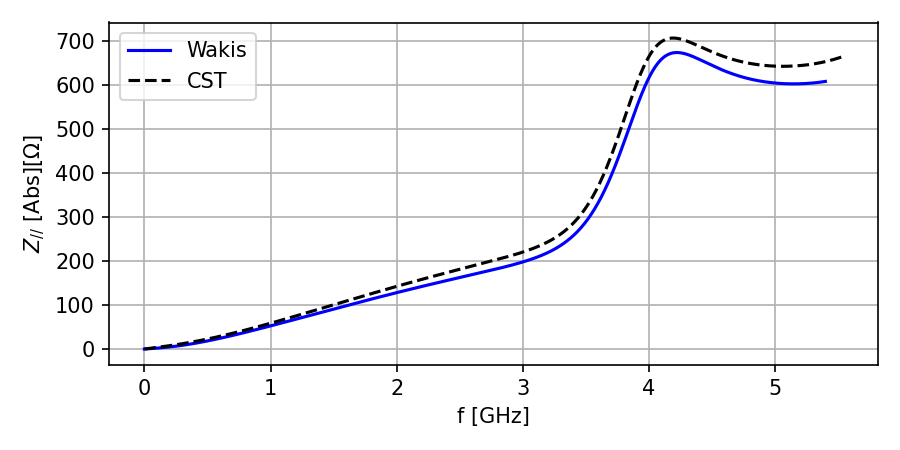

In [3]:
# CST wake and impedance
cstWP = wake.read_txt('CSTwake.txt')
cstZ = wake.read_txt('CSTZ.txt')
# cstZReIm = wake.read_txt('CSTZReIm.txt')


# WAKE
fig, ax = plt.subplots(figsize=(6, 3), dpi=150)
ax.plot(wake.s*1e3, wake.WP, c='r', lw=1.5, label='Wakis')
ax.plot(cstWP[0], cstWP[1], c='k', ls='--', lw=1.5, label='CST')
# ax.set_xlim(0, 1000)
# ax.set_ylim(-0.05, 0.05)
ax.set_xlabel('s [mm]')
ax.set_ylabel(r'$W_{//}$ [V/pC]', color='k')
ax.legend()
ax.grid(True)
fig.tight_layout()
fig.savefig('cfr_wake.png')
plt.show()


# IMPEDANCE
fig, ax = plt.subplots(figsize=(6, 3), dpi=150)
ax.plot(wake.f*1e-9, np.abs(wake.Z), c='b', lw=1.5, label='Wakis')
ax.plot(cstZ[0], cstZ[1], c='k', ls='--', lw=1.5, label='CST')
# ax.xlim(0,1000)
ax.set_xlabel('f [GHz]')
ax.set_ylabel(r'$Z_{//}$ [Abs][$\Omega$]', color='k')
ax.legend()
ax.grid(True)
#fig.suptitle('Benchmark with CST Wakefield Solver')
fig.tight_layout()
fig.savefig('cfr_Zmag.png')
plt.show()

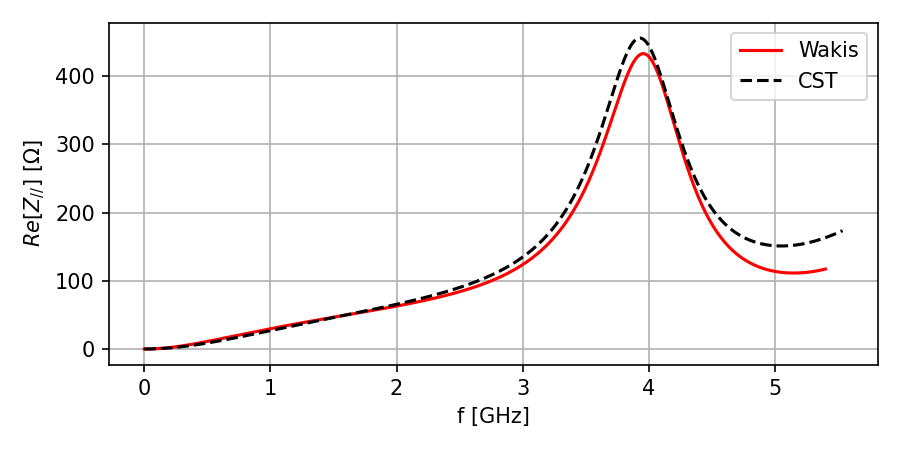

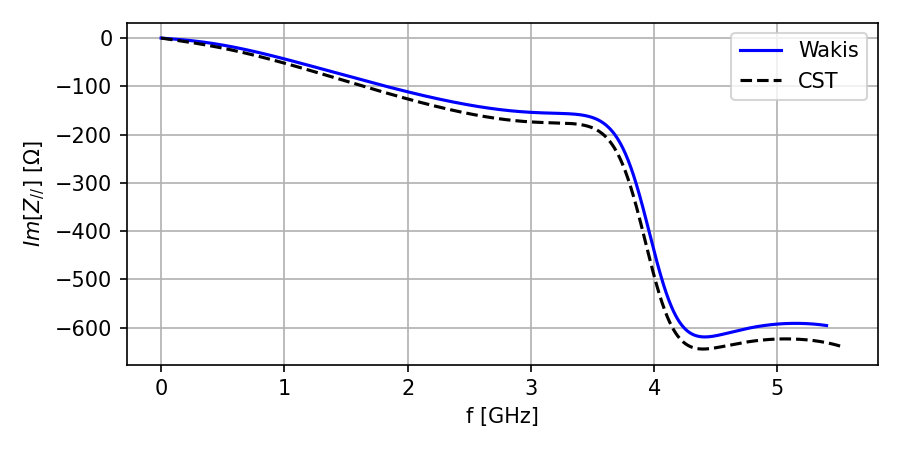

In [4]:
# cstWP = wake.read_txt('CSTwake.txt')
# cstZ = wake.read_txt('CSTZ.txt')
cstZReIm = wake.read_txt('CSTZReIm.txt')


fig, ax = plt.subplots(figsize=(6, 3), dpi=150)
ax.plot(wake.f*1e-9, np.real(wake.Z), c='r', lw=1.5, label='Wakis')
ax.plot(cstZReIm[0], cstZReIm[1], c='k', ls='--', lw=1.5, label='CST')
ax.set_xlabel('f [GHz]')
ax.set_ylabel(r'$Re[Z_{//}]$ [$\Omega$]', color='k')
ax.legend()
ax.grid(True)
fig.tight_layout()
fig.savefig('cfr_real.png')
plt.show()

fig, ax = plt.subplots(figsize=(6, 3), dpi=150)
ax.plot(wake.f*1e-9, np.imag(wake.Z), c='b', lw=1.5, label='Wakis')
ax.plot(cstZReIm[0], cstZReIm[2], c='k', ls='--', lw=1.5, label='CST')
ax.set_xlabel('f [GHz]')
ax.set_ylabel(r'$Im[Z_{//}]$ [$\Omega$]', color='k')
ax.legend()
ax.grid(True)
#fig.suptitle('Benchmark with CST Wakefield Solver')
fig.tight_layout()
fig.savefig('cfr_imag.png')
plt.show()